<b> Importing The Required Libaries </b>

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor

Understand The Data

Let's load in the dataset and display it

In [2]:
houseprices_df = pd.read_csv('Housing.csv')
houseprices_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
houseprices_df.shape

(545, 13)

In [4]:
houseprices_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
houseprices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Prepare The Data

To ensure data integrity, lets check for the existence missing values. The .sum() sums up the missing values for each column and returns a value other than zero (0) if null values are found within the dataset.

In [6]:
#Checks for null values within the dataset per column and sums the number of missing values per row.
houseprices_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no null values within our dataset.

We can proceed.



Quick Exploratory Data Analysis to know more about our data.   
Plot a scatter plot of 'area' vs. 'price' to visualize the relationship between the two variables


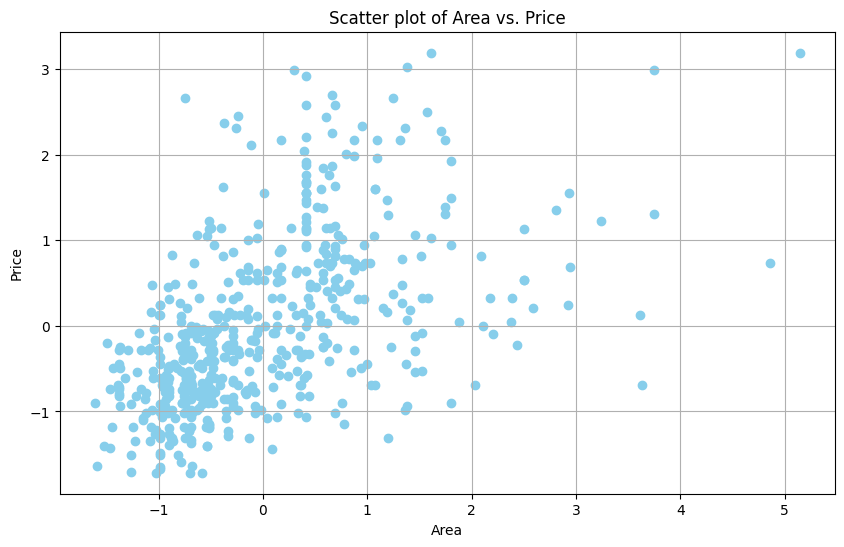

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(houseprices_df['area'], houseprices_df['price'], color='skyblue')
plt.title('Scatter plot of Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Feature Engineering

In [7]:
houseprices_df['total_rooms'] = houseprices_df['bedrooms'] + houseprices_df['bathrooms']
houseprices_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,6
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,8
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,5
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,6
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5


Outlier Detection and Handling

In [10]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)

# Detect outliers in 'price' column
outlier_indexes = detect_outliers_zscore(houseprices_df['price'])[0]
outliers = houseprices_df.iloc[outlier_indexes]
print("Number of outliers:", len(outliers))
print(outliers)

Number of outliers: 6
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furni

In [11]:
# Remove outliers
houseprices_df = houseprices_df.drop(outlier_indexes, axis=0).reset_index(drop=True)

Data Normalization

In [12]:
scaler = StandardScaler()
houseprices_df[['area', 'bedrooms', 'bathrooms', 'stories', 'price']] = scaler.fit_transform(houseprices_df[['area', 'bedrooms', 'bathrooms', 'stories', 'price']])
houseprices_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,total_rooms
0,3.193322,1.607004,1.416566,3.577717,2.546730,yes,no,no,no,yes,2,yes,semi-furnished,7
1,3.193322,5.143483,2.775158,3.577717,0.231911,yes,no,no,no,no,0,no,unfurnished,8
2,3.029690,1.384234,1.416566,-0.569357,0.231911,yes,yes,yes,no,yes,2,yes,furnished,5
3,2.988783,0.293587,0.057973,1.504180,2.546730,yes,yes,no,no,yes,1,yes,unfurnished,5
4,2.988783,3.751168,0.057973,-0.569357,0.231911,yes,no,yes,no,yes,2,yes,furnished,4


Split the data into training and testing sets.     
Spliting the dataset into training and testing sets helps to evaluate the model's performance.


In [13]:
X = houseprices_df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
y = houseprices_df['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create a pipeline for data preprocessing and model training.           
Using a pipeline helps to apply preprocessing steps and train the linear regression model.

In [16]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [17]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', LinearRegression())])

Train the model

In [20]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

Evaluate The Model.            
The model's performance is evaluated on the test data by using mean squared error, R-squared, and mean absolute error.


In [39]:
y_pred = model_pipeline.predict(X_test)

In [44]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3831665954208256


In [45]:
# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7074275915513447


In [46]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.4645863591699246


Cross-validation

In [49]:
# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", np.mean(cv_scores))

Cross-Validation Mean Squared Error: -0.6038705383900671


Hyperparameter Tuning

In [50]:
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]
}

In [51]:
# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Mean Squared Error:", -grid_search.best_score_)

Best Parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}
Best Mean Squared Error: 0.3685458734116148


Final Model with Best Parameters

In [53]:
final_model = grid_search.best_estimator_

Retrain the model on the entire dataset

In [52]:
final_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [28]:
import joblib
joblib.dump(final_model, 'final_model.pkl')
print("Final model saved as 'final_model.pkl'")

Final model saved as 'final_model.pkl'


Visualize the Predictions.


we would be visualizing the model's predictions on the training and test data and also be predicting prices using the trained model on the training data.

In [54]:
# Predict prices using the trained model
y_pred_train = final_model.predict(X_train)

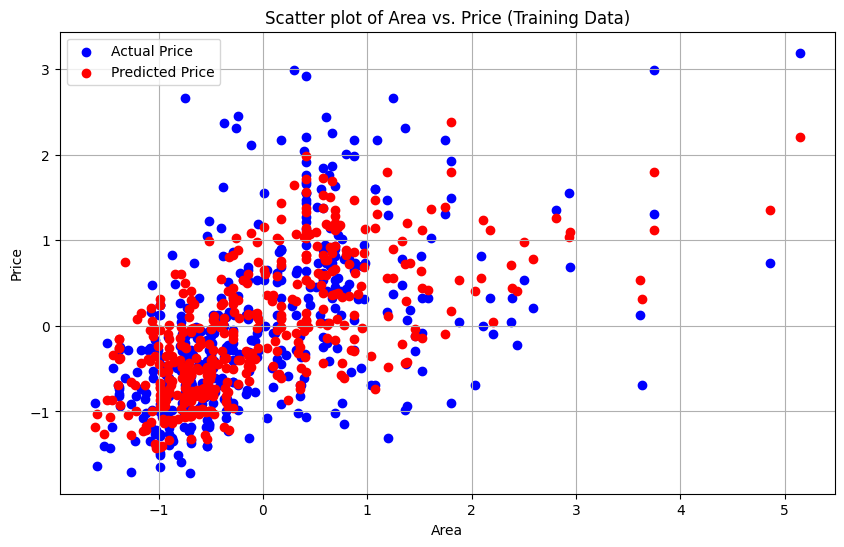

In [55]:
# Plot a scatter plot of 'area' vs. 'price' for the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train['area'], y_train, color='blue', label='Actual Price')
plt.scatter(X_train['area'], y_pred_train, color='red', label='Predicted Price')
plt.title('Scatter plot of Area vs. Price (Training Data)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

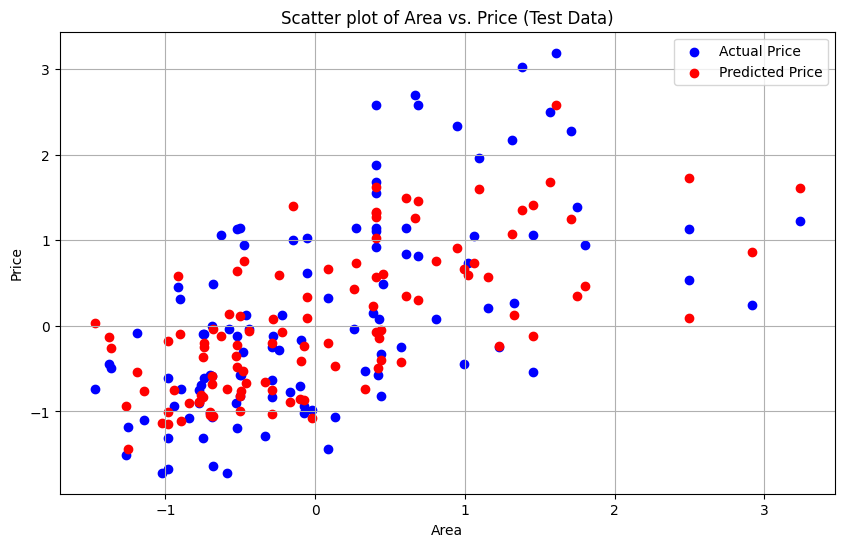

In [56]:
# Predict prices using the trained model on the test data
y_pred_test = final_model.predict(X_test)

# Plot a scatter plot of 'area' vs. 'price' for the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['area'], y_pred_test, color='red', label='Predicted Price')
plt.title('Scatter plot of Area vs. Price (Test Data)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Residual Analysis

Analyzing the residuals i.e (difference between actual and predicted values) to assess the model's performance.

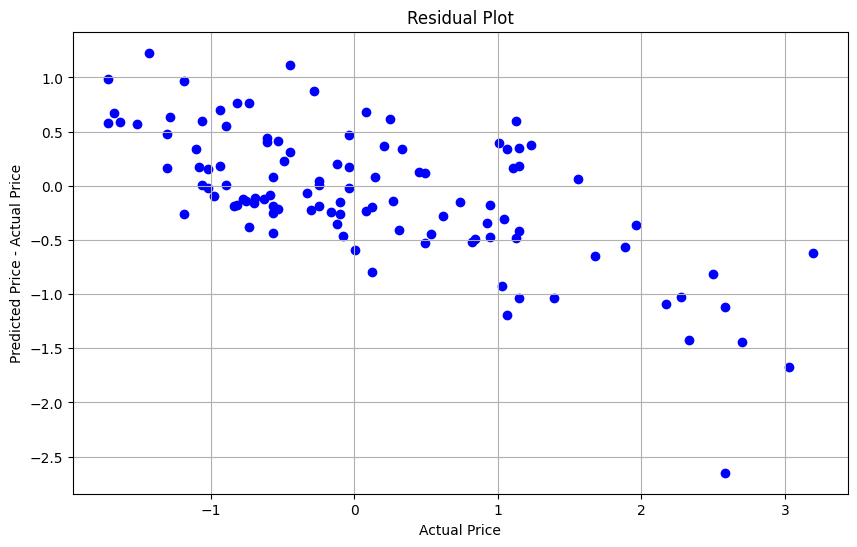

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test - y_test, color='blue')  # Residuals on y-axis
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price - Actual Price')
plt.grid(True)
plt.show()

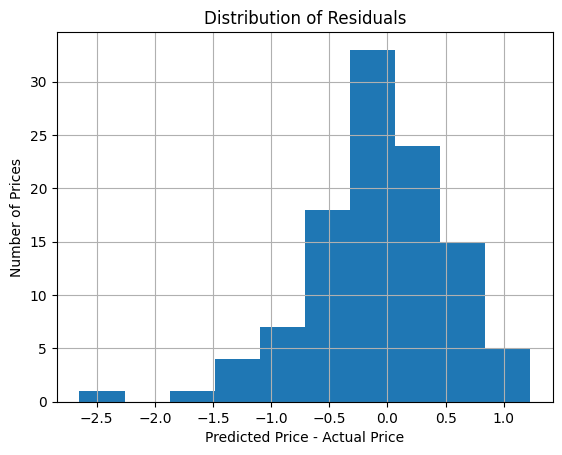

In [59]:
# Plot a histogram of the residuals to visualize their distribution
plt.hist(y_pred_test - y_test)
plt.xlabel('Predicted Price - Actual Price')
plt.ylabel('Number of Prices')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()